# Pet food customer orders: EDA and classification

**Dataset**:

[Pet Food Customer Order Online shared by Jahangir Raina](https://www.kaggle.com/jahangirraina/pet-food-customer-orders-online)

The dataset contains 49042 order transactions from a pet food subscription business, where each order is a dry food order and some are wet food orders. There are 36 attributes describing pet characteristics, website engagement, treats purchased, customer support etc.

Reference: [Pet Food Customer Orders Data Insights by Jahangir Raina](https://www.kaggle.com/jahangirraina/pet-food-customer-orders-data-insights)

**Notebook description**:

This exercise is focused on testing classification models for predicting wet food purchases. The algorithms used in this notebook include logistic regression, K-nearest neighbours, support vector machines, decision tree, random forest, extra trees, gradient boosting, AdaBoost and XGBoost. 

**Notebook contents**:

* Basic data exploration
* Feature extraction
* Data aggregation
* Visualizations
* Preprocessing 
* Feature selection
* Classification


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import seaborn as sns

In [2]:
for dirname, _, filenames in os.walk('/Data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Data/.DS_Store
/Data/pet_food_customer_orders.csv


In [3]:
filepath = "/Data/pet_food_customer_orders.csv"
data = pd.read_csv(filepath)
data.head()

,customer_id,pet_id,pet_order_number,wet_food_order_number,orders_since_first_wet_trays_order,pet_has_active_subscription,pet_food_tier,pet_signup_datetime,pet_allergen_list,pet_fav_flavour_list,...,dental_treat_packs,wet_food_textures_in_order,total_web_sessions,total_web_sessions_since_last_order,total_minutes_on_website,total_minutes_on_website_since_last_order,total_wet_food_updates,total_wet_food_updates_since_last_order,last_customer_support_ticket_date,customer_support_ticket_category
0,10574848487411271014,4466839344031767293,2,1.0,1.0,True,superpremium,1970-01-01 00:00:01.552397819,NaN,Chicken,...,0,gravy jelly pate,6,4,101,32,0,0,2019-03-16 09:10:12+00:00,proactive
1,10574848487411271014,4466839344031767293,1,NaN,NaN,True,superpremium,1970-01-01 00:00:01.552397819,NaN,Chicken,...,0,NaN,2,1,69,3,0,0,2019-03-16 09:10:12+00:00,proactive
2,10574848487411271014,4466839344031767293,8,7.0,7.0,True,superpremium,1970-01-01 00:00:01.552397819,NaN,Chicken,...,0,gravy jelly pate,18,0,184,0,0,0,2019-10-26 06:10:13+00:00,account
3,10574848487411271014,4466839344031767293,4,3.0,3.0,True,superpremium,1970-01-01 00:00:01.552397819,NaN,Chicken,...,0,gravy jelly pate,13,6,130,15,0,0,2019-04-23 06:28:12+00:00,account
4,10574848487411271014,4466839344031767293,9,8.0,8.0,True,superpremium,1970-01-01 00:00:01.552397819,NaN,Chicken,...,0,gravy jelly pate,19,1,184,0,0,0,2019-10-26 06:10:13+00:00,account


## Basic data exploration

In [10]:
data.shape

(49042, 36)

There are 49042 transactions in the dataset with 36 features 

In [13]:
print(data.dtypes)

customer_id                                   uint64
pet_id                                        uint64
pet_order_number                               int64
wet_food_order_number                        float64
orders_since_first_wet_trays_order           float64
pet_has_active_subscription                     bool
pet_food_tier                                 object
pet_signup_datetime                           object
pet_allergen_list                             object
pet_fav_flavour_list                          object
pet_health_issue_list                         object
neutered                                        bool
gender                                        object
pet_breed_size                                object
signup_promo                                  object
ate_wet_food_pre_tails                          bool
dry_food_brand_pre_tails                      object
pet_life_stage_at_order                       object
order_payment_date                            

In [8]:
data['order_payment_date'].min()


'2018-12-30 00:00:00.000000000'

In [9]:
data['order_payment_date'].max()

'2020-03-30 00:00:00.000000000'

In [14]:
data.describe()

,customer_id,pet_id,pet_order_number,wet_food_order_number,orders_since_first_wet_trays_order,kibble_kcal,wet_kcal,total_order_kcal,wet_trays,wet_food_discount_percent,premium_treat_packs,dental_treat_packs,total_web_sessions,total_web_sessions_since_last_order,total_minutes_on_website,total_minutes_on_website_since_last_order,total_wet_food_updates,total_wet_food_updates_since_last_order
count,4.904200e+04,4.904200e+04,49042.000000,12788.000000,14372.000000,49042.000000,49042.000000,49042.000000,49042.000000,12788.000000,49042.000000,49042.000000,49042.000000,49042.000000,49042.000000,49042.000000,49042.000000,49042.000000
mean,9.237652e+18,9.252460e+18,3.506545,2.914998,3.156137,19764.538353,861.480384,20790.572013,5.432140,0.149554,0.087354,0.275641,7.962298,2.036479,383.583969,92.716468,0.045410,0.030158
std,5.273450e+18,5.296804e+18,2.864754,2.312705,2.487372,13255.889361,1903.275965,13382.099355,10.888737,0.252432,0.471183,0.951677,9.732376,2.619178,822.173863,291.262819,0.316929,0.246854
min,1.969421e+15,3.629657e+14,1.000000,1.000000,1.000000,597.112000,0.000000,1481.660000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.748268e+18,4.648948e+18,1.000000,1.000000,1.000000,10127.275000,0.000000,11099.017000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.000000,0.000000,0.000000
50%,9.196879e+18,9.318042e+18,3.000000,2.000000,2.000000,16423.389500,0.000000,17540.532000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,59.000000,2.000000,0.000000,0.000000
75%,1.380478e+19,1.378622e+19,5.000000,4.000000,4.000000,26392.896500,973.350000,27645.782250,8.000000,0.499971,0.000000,0.000000,11.000000,3.000000,433.000000,17.000000,0.000000,0.000000
max,1.844219e+19,1.844234e+19,20.000000,20.000000,20.000000,168958.655000,55914.900000,168958.655000,248.000000,2.000235,23.000000,20.000000,124.000000,51.000000,23734.000000,8203.000000,9.000000,9.000000


In [16]:
data['customer_id'].nunique()

11168

In [17]:
data['pet_id'].nunique()

13087

There are 11168 unique customer IDs and 13087 unique pet IDs in the dataset. 
Some customers have multiple pets. 

In [172]:
round(data.describe().T, 3)

,count,mean,std,min,25%,50%,75%,max
customer_id,49042.0,9.237652e+18,5.273450e+18,1.969421e+15,4.748268e+18,9.196879e+18,1.380478e+19,1.844219e+19
pet_id,49042.0,9.252460e+18,5.296804e+18,3.629657e+14,4.648948e+18,9.318042e+18,1.378622e+19,1.844234e+19
pet_order_number,49042.0,3.507000e+00,2.865000e+00,1.000000e+00,1.000000e+00,3.000000e+00,5.000000e+00,2.000000e+01
wet_food_order_number,12788.0,2.915000e+00,2.313000e+00,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,2.000000e+01
orders_since_first_wet_trays_order,14372.0,3.156000e+00,2.487000e+00,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,2.000000e+01
kibble_kcal,49042.0,1.976454e+04,1.325589e+04,5.971120e+02,1.012727e+04,1.642339e+04,2.639290e+04,1.689587e+05
wet_kcal,49042.0,8.614800e+02,1.903276e+03,0.000000e+00,0.000000e+00,0.000000e+00,9.733500e+02,5.591490e+04
total_order_kcal,49042.0,2.079057e+04,1.338210e+04,1.481660e+03,1.109902e+04,1.754053e+04,2.764578e+04,1.689587e+05
wet_trays,49042.0,5.432000e+00,1.088900e+01,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00,2.480000e+02
wet_food_discount_percent,12788.0,1.500000e-01,2.520000e-01,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e-01,2.000000e+00


Average of 2 web sessions since last order with 93 minutes spent on website since last order. 

In [19]:
data.describe(include=np.object)

,pet_food_tier,pet_signup_datetime,pet_allergen_list,pet_fav_flavour_list,pet_health_issue_list,gender,pet_breed_size,signup_promo,dry_food_brand_pre_tails,pet_life_stage_at_order,order_payment_date,wet_tray_size,wet_food_textures_in_order,last_customer_support_ticket_date,customer_support_ticket_category
count,49042,49042,10758,21022,23716,49042,49042,49042,42670,49042,49042,49042,12788,10280,10241
unique,3,12508,200,16,15,2,5,13,136,4,435,4,7,3493,27
top,superpremium,1970-01-01 00:00:01.555327958,beef dairy egg soya wheat,Chicken,digestion,male,small,Null & Default,Harringtons,mature,2020-01-26 00:00:00.000000000,None,gravy jelly pate,2019-01-02 15:18:03+00:00,account
freq,28531,30,2046,5513,7827,26710,15751,12059,4488,29133,524,36254,5723,28,2148


Pet signup datetime seem to be meaningful.   

In [21]:
#missing data analysis 
data.isnull().sum()

customer_id                                      0
pet_id                                           0
pet_order_number                                 0
wet_food_order_number                        36254
orders_since_first_wet_trays_order           34670
pet_has_active_subscription                      0
pet_food_tier                                    0
pet_signup_datetime                              0
pet_allergen_list                            38284
pet_fav_flavour_list                         28020
pet_health_issue_list                        25326
neutered                                         0
gender                                           0
pet_breed_size                                   0
signup_promo                                     0
ate_wet_food_pre_tails                           0
dry_food_brand_pre_tails                      6372
pet_life_stage_at_order                          0
order_payment_date                               0
kibble_kcal                    

In [25]:
shortlisted_features = ['wet_food_order_number', 'pet_has_active_subscription', 'pet_food_tier', 'neutered', 
                    'gender', 'pet_breed_size', 'ate_wet_food_pre_tails', 'pet_life_stage_at_order','customer_support_ticket_category']
for var in shortlisted_features:
    print(data.groupby(var).size())

wet_food_order_number
1.0     4181
2.0     3035
3.0     1890
4.0     1300
5.0      888
6.0      567
7.0      348
8.0      191
9.0      120
10.0      76
11.0      57
12.0      40
13.0      33
14.0      20
15.0      14
16.0      10
17.0       8
18.0       4
19.0       4
20.0       2
dtype: int64
pet_has_active_subscription
False    16147
True     32895
dtype: int64
pet_food_tier
mid             11518
premium          8993
superpremium    28531
dtype: int64
neutered
False    21529
True     27513
dtype: int64
gender
female    22332
male      26710
dtype: int64
pet_breed_size
giant      1108
large     10894
medium    14657
small     15751
toy        6632
dtype: int64
ate_wet_food_pre_tails
False    31258
True     17784
dtype: int64
pet_life_stage_at_order
half_maturity     8712
mature           29133
senior            7810
weaning           3387
dtype: int64
customer_support_ticket_category
account               2148
blend                   28
call_back                3
delivery            

## Feature extraction

Number of pets in household

In [28]:
pet_count = pd.DataFrame(data.groupby('customer_id')['pet_id'].nunique().reset_index())
pet_count.shape

(11168, 2)

In [33]:
pet_count.columns=['customer_id', 'number_of_pets_in_house']
data_updated = pd.merge(data,pet_count, on='customer_id')

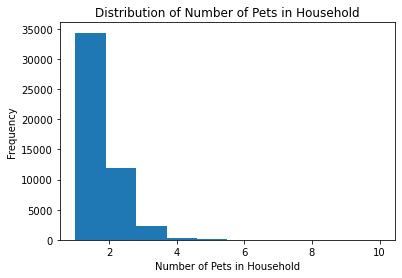

In [38]:
ax = plt.axes()
ax.hist(data_updated.number_of_pets_in_house);

ax.set(xlabel='Number of Pets in Household', 
       ylabel='Frequency',
       title='Distribution of Number of Pets in Household');

Communication

In [40]:
#parse date
data_updated['last_customer_support_ticket_date']= data_updated['last_customer_support_ticket_date'].astype('datetime64[ns]')
data_updated['order_payment_date']= data_updated['order_payment_date'].astype('datetime64[ns]')

In [42]:
#find gap between order_payment_date and last_customer_support_ticket_date
data_updated['communication_gap'] = ((data_updated['order_payment_date'].dt.date -  data_updated['last_customer_support_ticket_date'].dt.date)/np.timedelta64(1, 'D'))

In [48]:
data_updated.communication_gap.describe()

count    10280.000000
mean       105.710117
std        184.313917
min         -7.000000
25%         12.000000
50%         45.000000
75%        117.000000
max       1814.000000
Name: communication_gap, dtype: float64

In [45]:
#how many transactions had customer support ticket
data_updated['last_customer_support_ticket_date'].isnull().sum()

38762

38762 transactions out of 49042 did not have last_customer_support_ticket_date

In [46]:
#how many transactions had prior customer communication
data_updated['communication'] = np.where(data_updated['communication_gap'] > 0, 1, 0)

In [47]:
data_updated.groupby('communication').size() 

communication
0    39756
1     9286
dtype: int64

9286 transactions out of 49042 had a prior customer communication 

In [49]:
#mean gap by customer support category
data_updated.groupby('customer_support_ticket_category')['communication_gap'].mean().sort_values()

customer_support_ticket_category
misc                     3.400000
website                  6.827715
products                 7.859729
call_back               10.000000
portion                 43.598291
tech_issue              60.558442
other_products          65.857143
dry_food                67.123686
wet_food_top-up         69.306569
kibble_site_change      80.000000
wet_food                82.972327
sign_up                 91.127172
nutrition_team          96.699801
general                101.225564
product_complaint      116.716346
delivery               118.630458
account                121.660615
payment                134.341935
health                 145.966912
france                 150.888889
proactive              162.619048
packaging              560.441176
yodel                  674.142857
blend                  680.857143
product                713.000000
promotion              760.166667
proactive_cs          1156.333333
Name: communication_gap, dtype: float64

In [51]:
del data_updated['communication_gap']

In [570]:
#how many transactions include premium_treat_packs
data_updated['treats_premium'] = np.where(data_updated['premium_treat_packs'] > 0, 1, 0)
data_updated.groupby('treats_premium').size()

treats_premium
0    46396
1     2646
dtype: int64

In [571]:
#how many transactions include dental_treat_packs
data_updated['treats_dental'] = np.where(data_updated['dental_treat_packs'] > 0, 1, 0)
data_updated.groupby('treats_dental').size()

treats_dental
0    43836
1     5206
dtype: int64

2646 transactions include premium_treat_packs
5206 transactions include dental_treat_packs

In [103]:
del data_updated['treats_premium']
del data_updated['treats_dental']

Days before closing

In [54]:
data_updated['days_before_closing'] = ((data_updated['order_payment_date'].max() -  data_updated['order_payment_date'])/np.timedelta64(1, 'D'))
data_updated['days_before_closing'].describe()

count    49042.000000
mean       132.302006
std         93.493293
min          0.000000
25%         62.000000
50%        116.000000
75%        180.000000
max        456.000000
Name: days_before_closing, dtype: float64

Ratio of wet food to dry food 

In [56]:
data_updated['wet_dry_cal_ratio'] = data_updated['wet_kcal']/data_updated['kibble_kcal']
data_updated['wet_dry_cal_ratio'] = data_updated['wet_dry_cal_ratio'].round(2)
data_updated['wet_dry_cal_ratio'].describe()

count    49042.000000
mean         0.072363
std          0.206855
min          0.000000
25%          0.000000
50%          0.000000
75%          0.060000
max         15.700000
Name: wet_dry_cal_ratio, dtype: float64

## Data aggregation
Aggregating by pet_id 

In [77]:
numeric_data = data_updated.groupby('pet_id').agg({'pet_order_number':['max'],                   
    'kibble_kcal':['mean'],                          
    'wet_food_discount_percent':['mean'],            
    'total_minutes_on_website_since_last_order':['mean'],  
    'number_of_pets_in_house':['mean'],            
    'communication':['max'],                       
    'days_before_closing':['max'],                 
    'wet_dry_cal_ratio':['mean'],
    'premium_treat_packs':['sum'],
    'dental_treat_packs':['sum'],
    'wet_food_order_number':['max']})

In [79]:
numeric_data.shape

(13087, 11)

In [80]:
numeric_data.columns.ravel()

array([('pet_order_number', 'max'), ('kibble_kcal', 'mean'),
       ('wet_food_discount_percent', 'mean'),
       ('total_minutes_on_website_since_last_order', 'mean'),
       ('number_of_pets_in_house', 'mean'), ('communication', 'max'),
       ('days_before_closing', 'max'), ('wet_dry_cal_ratio', 'mean'),
       ('premium_treat_packs', 'sum'), ('dental_treat_packs', 'sum'),
       ('wet_food_order_number', 'max')], dtype=object)

In [81]:
#join field names
numeric_data.columns = ["_".join(numeric_data) for numeric_data in numeric_data.columns.ravel()]

In [82]:
numeric_data.head()

,pet_order_number_max,kibble_kcal_mean,wet_food_discount_percent_mean,total_minutes_on_website_since_last_order_mean,number_of_pets_in_house_mean,communication_max,days_before_closing_max,wet_dry_cal_ratio_mean,premium_treat_packs_sum,dental_treat_packs_sum,wet_food_order_number_max
pet_id,,,,,,,,,,,
362965707402215,1,6198.344,NaN,0.000,1,0,54.0,0.00,0,0,NaN
706834797910282,4,11028.579,NaN,1.000,1,0,125.0,0.00,1,8,NaN
2956959132340850,1,2398.968,NaN,496.000,1,0,165.0,0.00,0,0,NaN
3456354353280655,4,24311.125,0.0,3.000,1,0,78.0,0.02,0,14,2.0
4037557184041398,8,13807.700,NaN,0.125,2,0,204.0,0.00,0,0,NaN


In [83]:
#reset index
numeric_data = numeric_data.reset_index()

In [84]:
numeric_data.shape

(13087, 12)

In [85]:
#check missing data
numeric_data.isnull().sum()

pet_id                                               0
pet_order_number_max                                 0
kibble_kcal_mean                                     0
wet_food_discount_percent_mean                    8824
total_minutes_on_website_since_last_order_mean       0
number_of_pets_in_house_mean                         0
communication_max                                    0
days_before_closing_max                              0
wet_dry_cal_ratio_mean                               0
premium_treat_packs_sum                              0
dental_treat_packs_sum                               0
wet_food_order_number_max                         8824
dtype: int64

In [86]:
#fill missing with 0
numeric_data = numeric_data.replace(np.nan, 0)

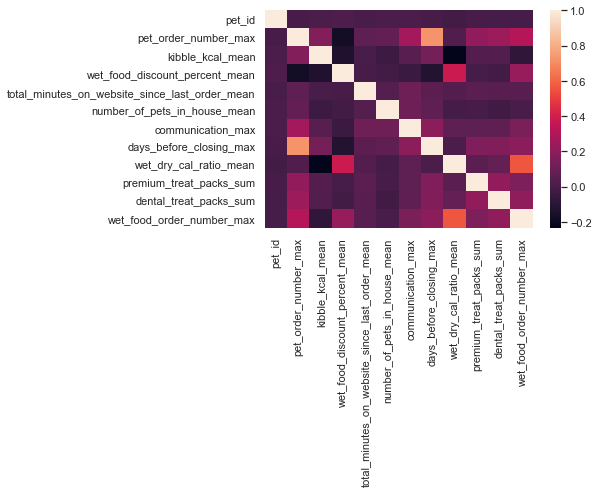

In [512]:
sns.heatmap(numeric_data.corr())

In [169]:
categorical_data = ['pet_has_active_subscription', 'pet_food_tier', 'pet_allergen_list', 'pet_fav_flavour_list', 
                    'pet_health_issue_list', 'neutered', 'gender','pet_breed_size', 'signup_promo', 'ate_wet_food_pre_tails',
                    'pet_life_stage_at_order']

In [170]:
categorical_data = data.groupby('pet_id')[categorical_data].max().reset_index()

In [159]:
categorical_data.shape

(13087, 12)

In [118]:
#merge numeric data and categorical data
merge_data = pd.merge(numeric_data, categorical_data, on='pet_id')

In [119]:
merge_data.columns

Index(['pet_id', 'pet_order_number_max', 'kibble_kcal_mean',
       'wet_food_discount_percent_mean',
       'total_minutes_on_website_since_last_order_mean',
       'number_of_pets_in_house_mean', 'communication_max',
       'days_before_closing_max', 'wet_dry_cal_ratio_mean',
       'premium_treat_packs_sum', 'dental_treat_packs_sum',
       'wet_food_order_number_max', 'pet_has_active_subscription',
       'pet_food_tier', 'pet_allergen_list', 'pet_fav_flavour_list',
       'pet_health_issue_list', 'neutered', 'gender', 'pet_breed_size',
       'signup_promo', 'ate_wet_food_pre_tails', 'pet_life_stage_at_order'],
      dtype='object')

### Labels

In [120]:
merge_data['Label'] = np.where(merge_data['wet_food_order_number_max'] > 0, 1, 0)

In [121]:
merge_data_1 = merge_data[merge_data['Label']==1]

In [122]:
del merge_data_1['Label']

In [123]:
merge_data_1['Label'] = np.where(merge_data_1['wet_food_order_number_max'] > 1, 2, 1)

<ipython-input-123-fd3e97e4e43e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_data_1['Label'] = np.where(merge_data_1['wet_food_order_number_max'] > 1, 2, 1)


In [124]:
merge_data_1.shape

(4263, 24)

In [125]:
merge_data['LabelB'] = 0
merge_data.loc[merge_data.wet_food_order_number_max>0,'LabelB'] = 1
merge_data.loc[merge_data.wet_food_order_number_max>1,'LabelB'] = 2

In [126]:
merge_data.groupby('Label').size()

Label
0    8824
1    4263
dtype: int64

## Visualizations

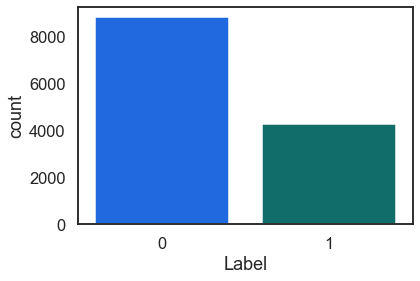

In [489]:
chart=sns.countplot(x='Label', data = merge_data) 
plt.show()

In [127]:
merge_data.groupby('LabelB').size()

LabelB
0    8824
1    1131
2    3132
dtype: int64

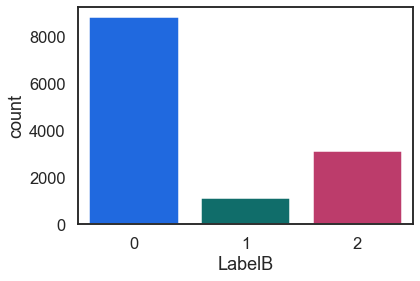

In [490]:
chart=sns.countplot(x='LabelB', data = merge_data)
plt.show()

In [128]:
merge_data.isnull().sum()

pet_id                                                0
pet_order_number_max                                  0
kibble_kcal_mean                                      0
wet_food_discount_percent_mean                        0
total_minutes_on_website_since_last_order_mean        0
number_of_pets_in_house_mean                          0
communication_max                                     0
days_before_closing_max                               0
wet_dry_cal_ratio_mean                                0
premium_treat_packs_sum                               0
dental_treat_packs_sum                                0
wet_food_order_number_max                             0
pet_has_active_subscription                           0
pet_food_tier                                         0
pet_allergen_list                                 10477
pet_fav_flavour_list                               7560
pet_health_issue_list                              6877
neutered                                        

There are missing values in pet_allergen_list, pet_fav_flavour_list and pet_health_issue_list

In [492]:
data_viz = merge_data.copy()
del data_viz['pet_id']

Text(0, 0.5, 'Number of Pets')

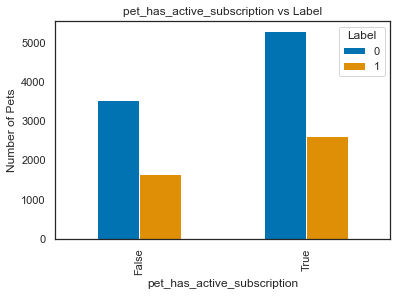

In [508]:
sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('colorblind')

pd.crosstab(data_viz.pet_has_active_subscription,data_viz.Label).plot(kind='bar')
plt.title('pet_has_active_subscription vs Label')
plt.xlabel('pet_has_active_subscription')
plt.ylabel('Number of Pets')

Text(0, 0.5, 'Number of Pets')

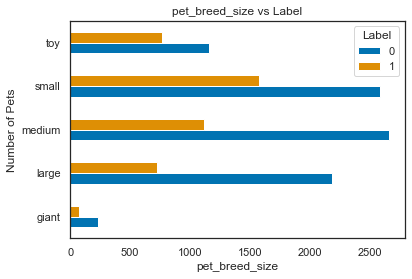

In [509]:
pd.crosstab(data_viz.pet_breed_size,data_viz.Label).plot(kind='barh')
plt.title('pet_breed_size vs Label')
plt.xlabel('pet_breed_size')
plt.ylabel('Number of Pets')

Text(0, 0.5, 'number_of_pets_in_house')

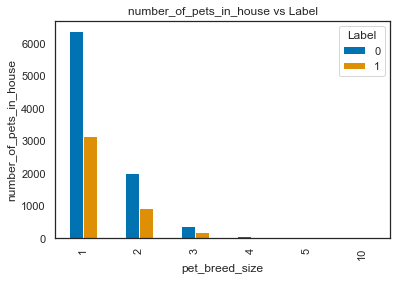

In [511]:
pd.crosstab(data_viz.number_of_pets_in_house_mean,data_viz.Label).plot(kind='bar')
plt.title('number_of_pets_in_house vs Label')
plt.xlabel('pet_breed_size')
plt.ylabel('number_of_pets_in_house')

Text(0, 0.5, 'Number of Pets')

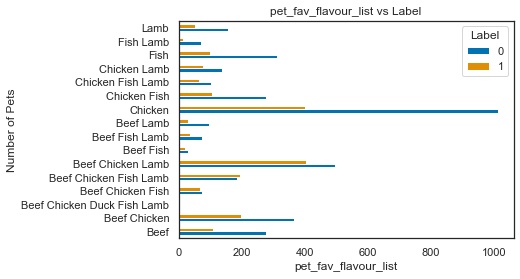

In [516]:
pd.crosstab(data_viz.pet_fav_flavour_list,data_viz.Label).plot(kind='barh')
plt.title('pet_fav_flavour_list vs Label')
plt.xlabel('pet_fav_flavour_list')
plt.ylabel('Number of Pets')

Text(0, 0.5, 'Number of Pets')

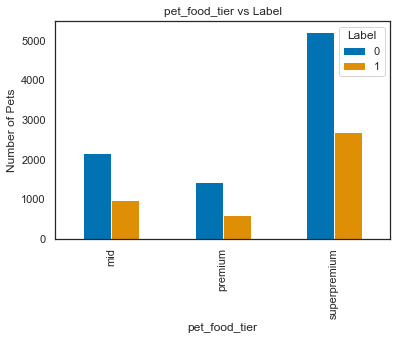

In [518]:
pd.crosstab(data_viz.pet_food_tier,data_viz.Label).plot(kind='bar')
plt.title('pet_food_tier vs Label')
plt.xlabel('pet_food_tier')
plt.ylabel('Number of Pets')

Text(0, 0.5, 'Number of Pets')

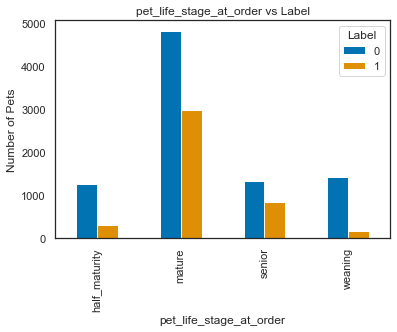

In [519]:
pd.crosstab(data_viz.pet_life_stage_at_order,data_viz.Label).plot(kind='bar')
plt.title('pet_life_stage_at_order vs Label')
plt.xlabel('pet_life_stage_at_order')
plt.ylabel('Number of Pets')

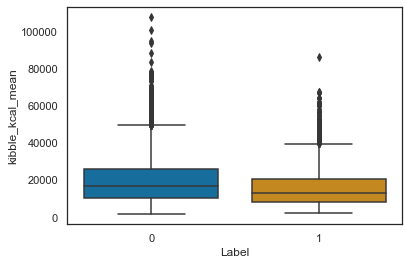

In [573]:
ax = sns.boxplot(x="Label", y="kibble_kcal_mean", data=data_viz)

Text(0, 0.5, 'Frequency')

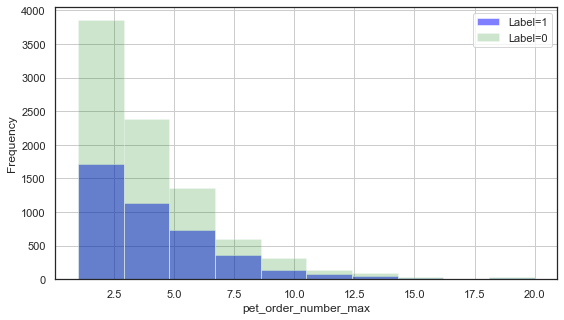

In [551]:
plt.figure(figsize=(9,5))
data_viz[data_viz['Label']==1]['pet_order_number_max'].hist(alpha=0.5,color='blue',
                                              bins=10,label='Label=1')
data_viz[data_viz['Label']==0]['pet_order_number_max'].hist(alpha=0.2,color='green',
                                              bins=10,label='Label=0')
plt.legend()
plt.xlabel('pet_order_number_max')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

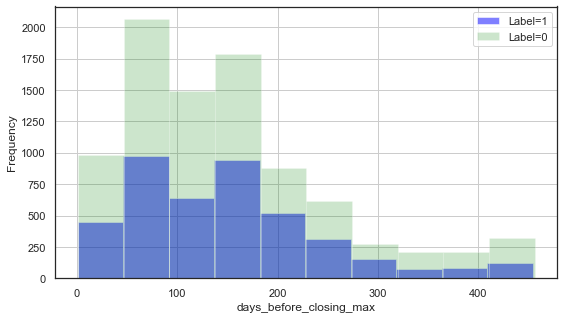

In [552]:
plt.figure(figsize=(9,5))
data_viz[data_viz['Label']==1]['days_before_closing_max'].hist(alpha=0.5,color='blue',
                                              bins=10,label='Label=1')
data_viz[data_viz['Label']==0]['days_before_closing_max'].hist(alpha=0.2,color='green',
                                              bins=10,label='Label=0')
plt.legend()
plt.xlabel('days_before_closing_max')
plt.ylabel('Frequency')

## Preprocessing

In [129]:
dummy_df = pd.get_dummies(categorical_data, 
    columns=['pet_has_active_subscription', 'pet_food_tier', 'pet_allergen_list', 'pet_fav_flavour_list', 
        'pet_health_issue_list', 'neutered', 'gender','pet_breed_size', 'signup_promo', 'ate_wet_food_pre_tails', 'pet_life_stage_at_order'], drop_first = False)

In [130]:
dummy_df.head()

,pet_id,pet_has_active_subscription_False,pet_has_active_subscription_True,pet_food_tier_mid,pet_food_tier_premium,pet_food_tier_superpremium,pet_allergen_list_beef,pet_allergen_list_beef chicken,pet_allergen_list_beef chicken dairy egg,pet_allergen_list_beef chicken dairy egg fish soya wheat,...,signup_promo_Search Generic,signup_promo_Shopping Centres,signup_promo_Social Marketing,signup_promo_Vet,ate_wet_food_pre_tails_False,ate_wet_food_pre_tails_True,pet_life_stage_at_order_half_maturity,pet_life_stage_at_order_mature,pet_life_stage_at_order_senior,pet_life_stage_at_order_weaning
0,362965707402215,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,706834797910282,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,2956959132340850,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
3,3456354353280655,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,4037557184041398,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [230]:
#merge numeric data with dummy data
transformed_df = pd.merge(numeric_data, dummy_df, on='pet_id')

In [231]:
transformed_df.shape

(13087, 276)

In [232]:
#table 1
transformed_df['Label'] = np.where(transformed_df['wet_food_order_number_max'] > 0, 1, 0)

#table 2
wet_food_df = transformed_df[transformed_df['Label']==1]
del wet_food_df['Label']
wet_food_df['Label'] = np.where(wet_food_df['wet_food_order_number_max'] > 1, 2, 1)

<ipython-input-232-fd59446b2923>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wet_food_df['Label'] = np.where(wet_food_df['wet_food_order_number_max'] > 1, 2, 1)


Correlation 

In [138]:
transformed_df.corr()['wet_food_order_number_max'].sort_values(ascending=False)

wet_food_order_number_max                1.000000
Label                                    0.735631
wet_dry_cal_ratio_mean                   0.565245
ate_wet_food_pre_tails_True              0.379861
pet_order_number_max                     0.317897
                                           ...   
kibble_kcal_mean                        -0.077684
neutered_False                          -0.102451
pet_life_stage_at_order_half_maturity   -0.106983
pet_life_stage_at_order_weaning         -0.142814
ate_wet_food_pre_tails_False            -0.379861
Name: wet_food_order_number_max, Length: 277, dtype: float64

In [139]:
transformed_df.corr()['wet_food_order_number_max'].sort_values(ascending=True)

ate_wet_food_pre_tails_False            -0.379861
pet_life_stage_at_order_weaning         -0.142814
pet_life_stage_at_order_half_maturity   -0.106983
neutered_False                          -0.102451
kibble_kcal_mean                        -0.077684
                                           ...   
pet_order_number_max                     0.317897
ate_wet_food_pre_tails_True              0.379861
wet_dry_cal_ratio_mean                   0.565245
Label                                    0.735631
wet_food_order_number_max                1.000000
Name: wet_food_order_number_max, Length: 277, dtype: float64

In [136]:
wet_food_df.corr()['wet_food_order_number_max'].sort_values(ascending=False)

wet_food_order_number_max                                1.000000
pet_order_number_max                                     0.763324
days_before_closing_max                                  0.541660
Label                                                    0.538919
dental_treat_packs_sum                                   0.287094
                                                           ...   
pet_allergen_list_lamb maize soya wheat                       NaN
pet_allergen_list_lamb maize wheat                            NaN
pet_fav_flavour_list_Beef Chicken Duck Fish Lamb              NaN
pet_health_issue_list_digestion, joints, pancreatitis         NaN
signup_promo_Vet                                              NaN
Name: wet_food_order_number_max, Length: 277, dtype: float64

In [137]:
wet_food_df.corr()['wet_food_order_number_max'].sort_values(ascending=True)

wet_food_discount_percent_mean                          -0.495103
pet_has_active_subscription_False                       -0.151221
pet_life_stage_at_order_half_maturity                   -0.100491
neutered_False                                          -0.082341
pet_breed_size_toy                                      -0.061023
                                                           ...   
pet_allergen_list_lamb maize soya wheat                       NaN
pet_allergen_list_lamb maize wheat                            NaN
pet_fav_flavour_list_Beef Chicken Duck Fish Lamb              NaN
pet_health_issue_list_digestion, joints, pancreatitis         NaN
signup_promo_Vet                                              NaN
Name: wet_food_order_number_max, Length: 277, dtype: float64

In [233]:
#delete the column wet_food_order_number_max from both tables
del transformed_df['wet_food_order_number_max']
del wet_food_df['wet_food_order_number_max']

In [234]:
#delete wet food indicators from table 1
del transformed_df['wet_food_discount_percent_mean']
del transformed_df['wet_dry_cal_ratio_mean']

In [235]:
transformed_df.groupby('Label').size()

Label
0    8824
1    4263
dtype: int64

In [236]:
wet_food_df.groupby('Label').size()

Label
1    1131
2    3132
dtype: int64

In [237]:
transformed_df.dtypes

pet_id                                             uint64
pet_order_number_max                                int64
kibble_kcal_mean                                  float64
total_minutes_on_website_since_last_order_mean    float64
number_of_pets_in_house_mean                        int64
                                                   ...   
pet_life_stage_at_order_half_maturity               uint8
pet_life_stage_at_order_mature                      uint8
pet_life_stage_at_order_senior                      uint8
pet_life_stage_at_order_weaning                     uint8
Label                                               int64
Length: 274, dtype: object

Scaling  

In [239]:
numeric_variables = list(set(transformed_df.columns)- set(dummy_df))

In [240]:
numeric_variables

['communication_max',
 'days_before_closing_max',
 'Label',
 'kibble_kcal_mean',
 'dental_treat_packs_sum',
 'total_minutes_on_website_since_last_order_mean',
 'premium_treat_packs_sum',
 'pet_order_number_max',
 'number_of_pets_in_house_mean']

In [241]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

In [242]:
for column in [numeric_variables]:
    transformed_df[column] = mm.fit_transform(transformed_df[column])

In [243]:
transformed_df.describe()

,pet_id,pet_order_number_max,kibble_kcal_mean,total_minutes_on_website_since_last_order_mean,number_of_pets_in_house_mean,communication_max,days_before_closing_max,premium_treat_packs_sum,dental_treat_packs_sum,pet_has_active_subscription_False,...,signup_promo_Shopping Centres,signup_promo_Social Marketing,signup_promo_Vet,ate_wet_food_pre_tails_False,ate_wet_food_pre_tails_True,pet_life_stage_at_order_half_maturity,pet_life_stage_at_order_mature,pet_life_stage_at_order_senior,pet_life_stage_at_order_weaning,Label
count,1.308700e+04,13087.000000,13087.000000,13087.000000,13087.000000,13087.000000,13087.000000,13087.000000,13087.000000,13087.000000,...,13087.000000,13087.000000,13087.000000,13087.000000,13087.000000,13087.000000,13087.000000,13087.000000,13087.000000,13087.000000
mean,9.253389e+18,0.150097,0.157086,0.017158,0.037815,0.206006,0.329664,0.005845,0.012912,0.395660,...,0.008329,0.016887,0.001834,0.607244,0.392756,0.119126,0.596393,0.163827,0.120654,0.325743
std,5.308837e+18,0.154816,0.111464,0.040935,0.072113,0.404450,0.218012,0.031012,0.046549,0.489011,...,0.090885,0.128853,0.042786,0.488382,0.488382,0.323949,0.490639,0.370132,0.325737,0.468670
min,3.629657e+14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.638767e+18,0.052632,0.074601,0.000028,0.000000,0.000000,0.162637,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.294519e+18,0.105263,0.128906,0.001328,0.000000,0.000000,0.294505,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.380591e+19,0.210526,0.215015,0.016480,0.111111,0.000000,0.430769,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.844234e+19,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Feature selection

In [248]:
features = transformed_df[transformed_df.columns.difference(['Label','pet_id'])]

labels = transformed_df['Label']

In [250]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(features,labels)
preds = clf.predict(features)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(preds,labels)
print(accuracy)

1.0


In [251]:
VI = pd.DataFrame(clf.feature_importances_, columns = ["RF"], index=features.columns)
VI = VI.reset_index()
VI

,index,RF
0,ate_wet_food_pre_tails_False,0.115361
1,ate_wet_food_pre_tails_True,0.113334
2,communication_max,0.011251
3,days_before_closing_max,0.073782
4,dental_treat_packs_sum,0.028336
...,...,...
267,signup_promo_Search Generic,0.011407
268,signup_promo_Shopping Centres,0.002150
269,signup_promo_Social Marketing,0.002472
270,signup_promo_Vet,0.000214


In [252]:
VI.sort_values(['RF'],ascending=0)[0:20]

,index,RF
0,ate_wet_food_pre_tails_False,0.115361
1,ate_wet_food_pre_tails_True,0.113334
7,kibble_kcal_mean,0.090604
3,days_before_closing_max,0.073782
271,total_minutes_on_website_since_last_order_mean,0.066622
256,pet_order_number_max,0.045479
4,dental_treat_packs_sum,0.028336
10,number_of_pets_in_house_mean,0.020067
253,pet_life_stage_at_order_mature,0.016651
255,pet_life_stage_at_order_weaning,0.015927


Using Random Forest, the important variables are 
* ate_wet_food_pre_tails
* kibble_kcal_mean
* days_before_closing_max 
* total_minutes_on_website_since_last_order_mean
* pet_order_number_max

In [253]:
transformed_df.corr()['Label'].sort_values(ascending=False)

Label                                    1.000000
ate_wet_food_pre_tails_True              0.507363
pet_life_stage_at_order_mature           0.145750
dental_treat_packs_sum                   0.100032
neutered_True                            0.096820
                                           ...   
neutered_False                          -0.096820
pet_life_stage_at_order_half_maturity   -0.103601
kibble_kcal_mean                        -0.148823
pet_life_stage_at_order_weaning         -0.178375
ate_wet_food_pre_tails_False            -0.507363
Name: Label, Length: 274, dtype: float64

In [254]:
transformed_df.corr()['Label'].sort_values(ascending=True)

ate_wet_food_pre_tails_False            -0.507363
pet_life_stage_at_order_weaning         -0.178375
kibble_kcal_mean                        -0.148823
pet_life_stage_at_order_half_maturity   -0.103601
neutered_False                          -0.096820
                                           ...   
neutered_True                            0.096820
dental_treat_packs_sum                   0.100032
pet_life_stage_at_order_mature           0.145750
ate_wet_food_pre_tails_True              0.507363
Label                                    1.000000
Name: Label, Length: 274, dtype: float64

## Classification

### Partition

In [255]:
class_df = transformed_df[transformed_df.columns.difference(['pet_id'])]
features = transformed_df[transformed_df.columns.difference(['Label','pet_id'])]
labels = transformed_df['Label']
class_features = transformed_df.columns.difference(['Label','pet_id'])
Selected_Features = ['kibble_kcal_mean', 'total_minutes_on_website_since_last_order_mean', 'ate_wet_food_pre_tails_True', 
                     'pet_life_stage_at_order_mature', 'pet_order_number_max',
                     'number_of_pets_in_house_mean', 'days_before_closing_max','dental_treat_packs_sum']

In [257]:
from sklearn.model_selection import StratifiedShuffleSplit
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(transformed_df[Selected_Features], transformed_df.Label))

In [259]:
#create dataframes
X_train = transformed_df.loc[train_idx, Selected_Features]
y_train = transformed_df.loc[train_idx, 'Label']

X_test  = transformed_df.loc[test_idx, Selected_Features]
y_test  = transformed_df.loc[test_idx, 'Label']

In [260]:
y_train.value_counts(normalize=True)

0.0    0.674236
1.0    0.325764
Name: Label, dtype: float64

In [261]:
y_test.value_counts(normalize=True)

0.0    0.674306
1.0    0.325694
Name: Label, dtype: float64

### Logistic regression 

In [262]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [263]:
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)

In [264]:
# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)


In [268]:
# Prediction 
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head()

,lr,l1,l2
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,1.0,1.0,1.0
3,1.0,1.0,1.0
4,0.0,0.0,0.0


In [269]:
y_prob.head()

,lr,l1,l2
0,0.928549,0.927759,0.925241
1,0.901009,0.903672,0.897635
2,0.523592,0.518848,0.526892
3,0.506046,0.504565,0.512362
4,0.868028,0.868588,0.862991


In [273]:
#metrics
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels:

    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1]),
              label_binarize(y_pred[lab], classes=[0,1]), 
              average='weighted')
    
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)

In [272]:
metrics

,lr,l1,l2
precision,0.770364,0.771098,0.770026
recall,0.767762,0.768016,0.766488
fscore,0.768924,0.769366,0.768014
accuracy,0.767762,0.768016,0.766488
auc,0.740888,0.742087,0.741156


In [276]:
import seaborn as sns
coloribm = {"Magenta 100":"2A0A16", "Magenta 90":"57002B", "Magenta 80":"760A3A", "Magenta 70":"A11950", "Magenta 60":"D12765", "Magenta 50":"EE538B", "Magenta 40":"FA75A6", "Magenta 30":"FFA0C2", "Magenta 20":"FFCFE1", "Magenta 10":"FFF0F6", "Purple 100":"1E1033", "Purple 90":"38146B", "Purple 80":"4F2196", "Purple 70":"6E32C9", "Purple 60":"8A3FFC", "Purple 50":"A66EFA", "Purple 40":"BB8EFF", "Purple 30":"D0B0FF", "Purple 20":"E6D6FF", "Purple 10":"F7F1FF", "Blue 100":"051243", "Blue 90":"061F80", "Blue 80":"0530AD", "Blue 70":"054ADA", "Blue 60":"0062FF", "Blue 50":"408BFC", "Blue 40":"6EA6FF", "Blue 30":"97C1FF", "Blue 20":"C9DEFF", "Blue 10":"EDF4FF", "Teal 100":"081A1C", "Teal 90":"003137", "Teal 80":"004548", "Teal 70":"006161", "Teal 60":"007D79", "Teal 50":"009C98", "Teal 40":"00BAB6", "Teal 30":"20D5D2", "Teal 20":"92EEEE", "Teal 10":"DBFBFB", "Gray 100":"171717", "Gray 90":"282828", "Gray 80":"3D3D3D", "Gray 70":"565656", "Gray 60":"6F6F6F", "Gray 50":"8C8C8C", "Gray 40":"A4A4A4", "Gray 30":"BEBEBE", "Gray 20":"DCDCDC", "Gray 10":"F3F3F3"} 
colors = []
colornum = 60
for i in [f'Blue {colornum}', f'Teal {colornum}', f'Magenta {colornum}', f'Purple {colornum}', f'Gray {colornum}']:
    colors.append(f'#{coloribm[i]}')
palette = sns.color_palette(colors)

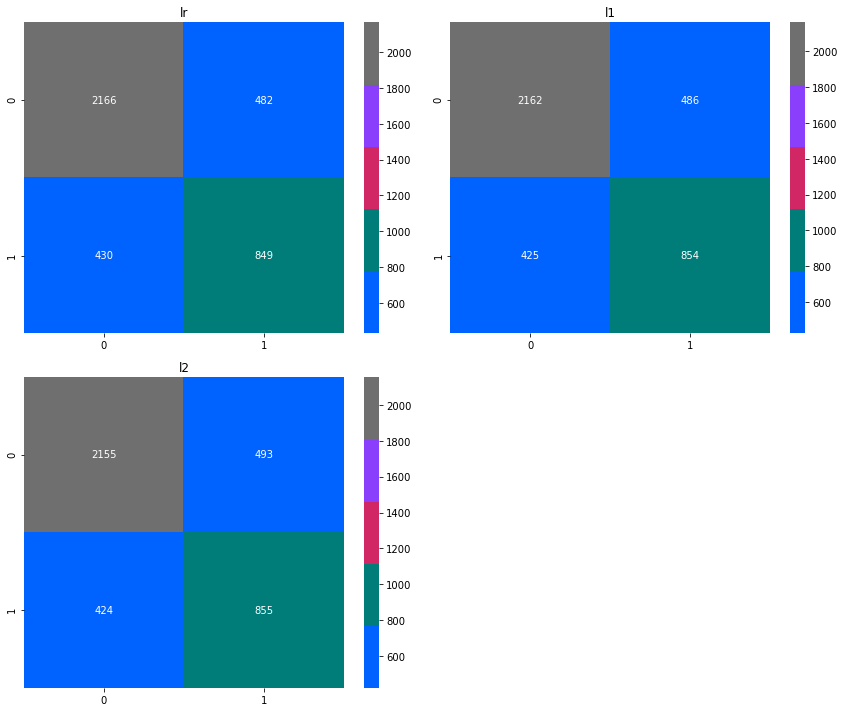

In [277]:
#plot confusion matrix
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d', cmap=colors);
    ax.set(title=lab);
    
plt.tight_layout()

### KNN

In [292]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

# k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# metrics
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

         0.0       0.79      0.83      0.81      2648
         1.0       0.61      0.56      0.58      1279

    accuracy                           0.74      3927
   macro avg       0.70      0.69      0.70      3927
weighted avg       0.73      0.74      0.74      3927

Accuracy score:  0.74
F1 Score:  0.58


In [293]:
confusion_matrix(y_test,y_pred)

array([[2193,  455],
       [ 567,  712]])

Text(0.5, 22.5, 'Actual')

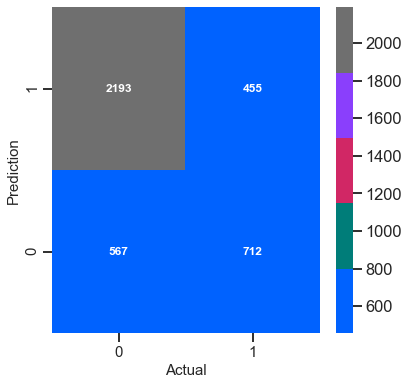

In [294]:
# Plot confusion matrix
sns.set_palette(sns.color_palette(colors))
_, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap=colors, annot_kws={"size": 12, "weight": "bold"})  
labels = ['0', '1']
ax.set_xticklabels(labels, fontsize=15);
ax.set_yticklabels(labels[::-1], fontsize=15);
ax.set_ylabel('Prediction', fontsize=15);
ax.set_xlabel('Actual', fontsize=15)

In [286]:
#find optimum K 
max_k = 40
f1_scores = list()
error_rates = list() # 1-accuracy

for k in range(1, max_k):
    
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_pred, y_test)
    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

<Figure size 1800x1200 with 0 Axes>

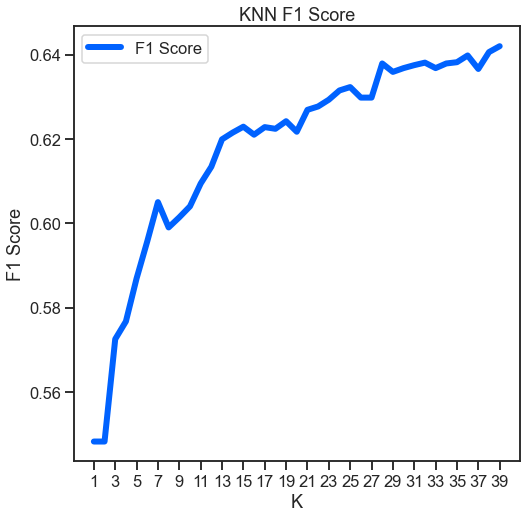

In [297]:
# Plot F1 results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = f1_results.set_index('K').plot(color=colors[0], figsize=(8, 8), linewidth=6)
ax.set(xlabel='K', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.title('KNN F1 Score')
plt.savefig('knn_f1.png')

<Figure size 1800x1200 with 0 Axes>

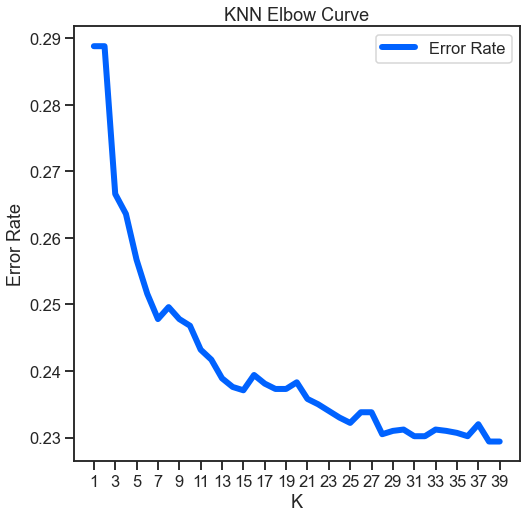

In [296]:
# Plot Accuracy (Error Rate) results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = error_results.set_index('K').plot(color=colors[0], figsize=(8, 8), linewidth=6)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(1, max_k, 2))
plt.title('KNN Elbow Curve')
plt.savefig('knn_elbow.png')

In [298]:
# k=7
knn = KNeighborsClassifier(n_neighbors=7)
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# metrics
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

         0.0       0.81      0.84      0.82      2648
         1.0       0.63      0.58      0.61      1279

    accuracy                           0.75      3927
   macro avg       0.72      0.71      0.71      3927
weighted avg       0.75      0.75      0.75      3927

Accuracy score:  0.75
F1 Score:  0.61


In [299]:
confusion_matrix(y_test,y_pred)

array([[2217,  431],
       [ 532,  747]])

Text(0.5, 22.5, 'Actual')

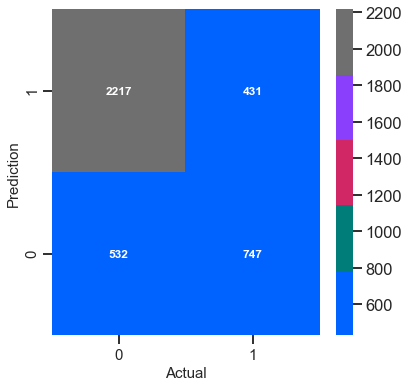

In [300]:
# Plot confusion matrix
sns.set_palette(sns.color_palette(colors))
_, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap=colors, annot_kws={"size": 12, "weight": "bold"})  
labels = ['0', '1']
ax.set_xticklabels(labels, fontsize=15);
ax.set_yticklabels(labels[::-1], fontsize=15);
ax.set_ylabel('Prediction', fontsize=15);
ax.set_xlabel('Actual', fontsize=15)

### SVM 

In [302]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [303]:
# Metrics
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

         0.0       0.87      0.78      0.82      2648
         1.0       0.62      0.75      0.68      1279

    accuracy                           0.77      3927
   macro avg       0.74      0.76      0.75      3927
weighted avg       0.79      0.77      0.77      3927

Accuracy score:  0.77
F1 Score:  0.68


In [304]:
from sklearn.tree import DecisionTreeClassifier

# DT with no set limits on on maximum depth, features, or leaves
dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)

In [305]:
dt.tree_.node_count, dt.tree_.max_depth

(3813, 37)

In [306]:
# Function to return error metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

In [307]:
# The error on the training and test data sets
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

,train,test
accuracy,1.0,0.702572
precision,1.0,0.542594
recall,1.0,0.552776
f1,1.0,0.547637


Overfitting is present

In [308]:
# Using grid search with cross validation 
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1)

GR = GR.fit(X_train, y_train)

In [309]:
GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth

(59, 5)

In [310]:
y_train_pred_gr = GR.predict(X_train)
y_test_pred_gr = GR.predict(X_test)

train_test_gr_error = pd.concat([measure_error(y_train, y_train_pred_gr, 'train'),
                                 measure_error(y_test, y_test_pred_gr, 'test')],
                                axis=1)

In [311]:
train_test_gr_error

,train,test
accuracy,0.794105,0.774892
precision,0.686735,0.653936
recall,0.676609,0.655981
f1,0.681634,0.654957


Test errors are better than before 

In [459]:
print(classification_report(y_test_pred_gr, y_test))

              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83      2644
         1.0       0.66      0.65      0.65      1283

    accuracy                           0.77      3927
   macro avg       0.74      0.74      0.74      3927
weighted avg       0.77      0.77      0.77      3927



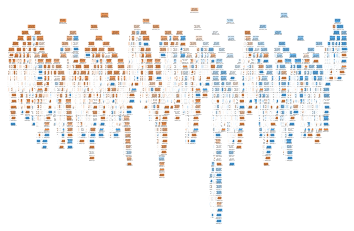

In [468]:
#plot tree
from sklearn import tree
tree.plot_tree(dt,filled=True);

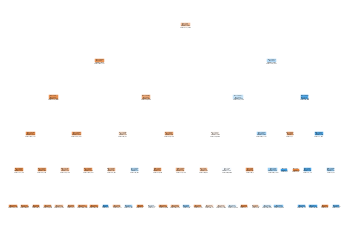

In [466]:
# plot pruned tree
tree.plot_tree(GR.best_estimator_,filled=True);

In [314]:
# Visualise tree 
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

filename = 'tree.png'
graph.write_png(filename)
Image(filename=filename)

# Visualise pruned tree 
dot_data = StringIO()
export_graphviz(GR.best_estimator_, out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

filename = 'tree_prune.png'
graph.write_png(filename)
Image(filename=filename) 

### Random Forest

In [320]:
# Suppress warnings about too few trees from the early models
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [321]:
from sklearn.ensemble import RandomForestClassifier

# random forest estimator
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    RF.set_params(n_estimators=n_trees)
    RF.fit(X_train, y_train)
    oob_error = 1 - RF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

,oob
n_trees,
15.0,0.239083
20.0,0.236135
30.0,0.231659
40.0,0.227402
50.0,0.222926
100.0,0.218341
150.0,0.215175
200.0,0.214738
300.0,0.215611


The error seem to stablized around 150-200 trees

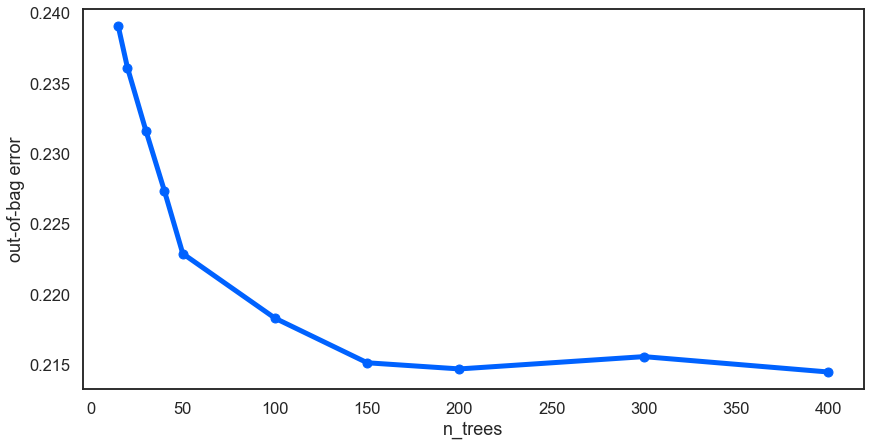

In [322]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

### Extra Trees

In [323]:
from sklearn.ensemble import ExtraTreesClassifier

EF = ExtraTreesClassifier(oob_score=True, 
                          random_state=42, 
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)
oob_list = list()


for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:

    EF.set_params(n_estimators=n_trees)
    EF.fit(X_train, y_train)

    oob_error = 1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

et_oob_df

,oob
n_trees,
15.0,0.239410
20.0,0.235153
30.0,0.228166
40.0,0.223581
50.0,0.225873
100.0,0.219651
150.0,0.218777
200.0,0.221070
300.0,0.217467


In [324]:
#combine two df out of bag errors
oob_df = pd.concat([rf_oob_df.rename(columns={'oob':'RandomForest'}),
                    et_oob_df.rename(columns={'oob':'ExtraTrees'})], axis=1)

oob_df

,RandomForest,ExtraTrees
n_trees,,
15.0,0.239083,0.239410
20.0,0.236135,0.235153
30.0,0.231659,0.228166
40.0,0.227402,0.223581
50.0,0.222926,0.225873
100.0,0.218341,0.219651
150.0,0.215175,0.218777
200.0,0.214738,0.221070
300.0,0.215611,0.217467


The Random forest model has a slightly better performance as compared to extra randomized trees. 

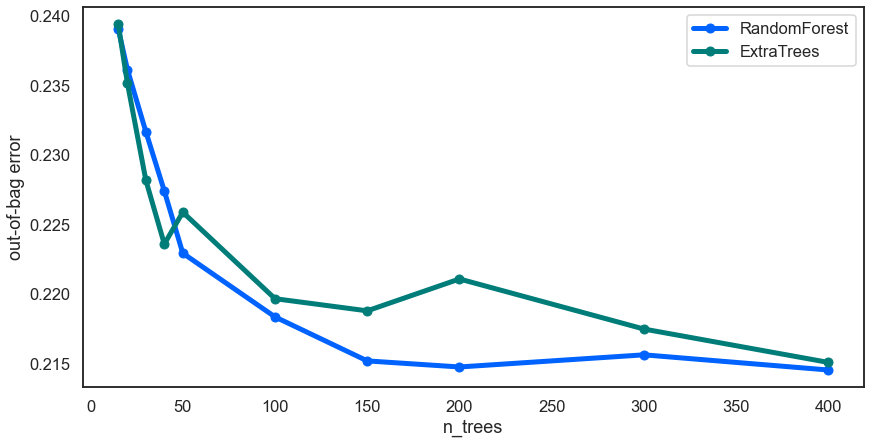

In [325]:
sns.set_context('talk')
sns.set_style('white')

ax = oob_df.plot(marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [330]:
# Random forest with 100 estimators
model = RF.set_params(n_estimators=100)

y_pred = model.predict(X_test)

In [331]:
cr = classification_report(y_test, y_pred)
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index([0]))

print(score_df)

              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84      2648
         1.0       0.68      0.61      0.64      1279

    accuracy                           0.78      3927
   macro avg       0.75      0.73      0.74      3927
weighted avg       0.77      0.78      0.77      3927

   accuracy  precision    recall        f1       auc
0  0.777948   0.677729  0.606724  0.640264  0.733687


Text(0.5, 22.5, 'Actual')

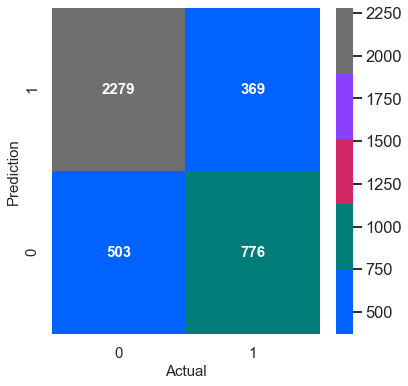

In [338]:
# Plot confusion matrix 
sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred)
_, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap=colors, annot_kws={"size": 15, "weight": "bold"})

ax.set_xticklabels(labels, fontsize=15);
ax.set_yticklabels(labels[::-1], fontsize=15);
ax.set_ylabel('Prediction', fontsize=15);
ax.set_xlabel('Actual', fontsize=15)

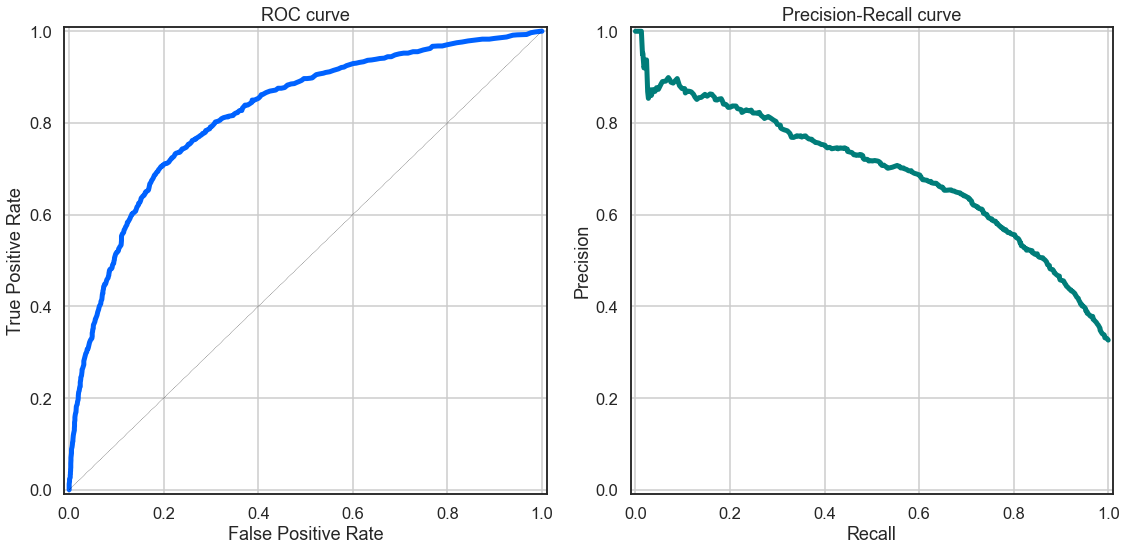

In [340]:
# Plot ROC-AUC and precision-recall curves
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix

sns.set_context('talk')

fig, axList = plt.subplots(ncols=2)
fig.set_size_inches(16, 8)

# Get the probabilities for each of the two categories
y_prob = model.predict_proba(X_test)

# Plot the ROC-AUC curve
ax = axList[0]

fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
ax.plot(fpr, tpr, color=colors[0], linewidth=5)
ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='ROC curve')
ax.grid(True)

# Plot the precision-recall curve
ax = axList[1]

precision, recall, _ = precision_recall_curve(y_test, y_prob[:,1])
ax.plot(recall, precision, color=colors[1], linewidth=5)
ax.set(xlabel='Recall', ylabel='Precision',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Precision-Recall curve')
ax.grid(True)

plt.tight_layout()

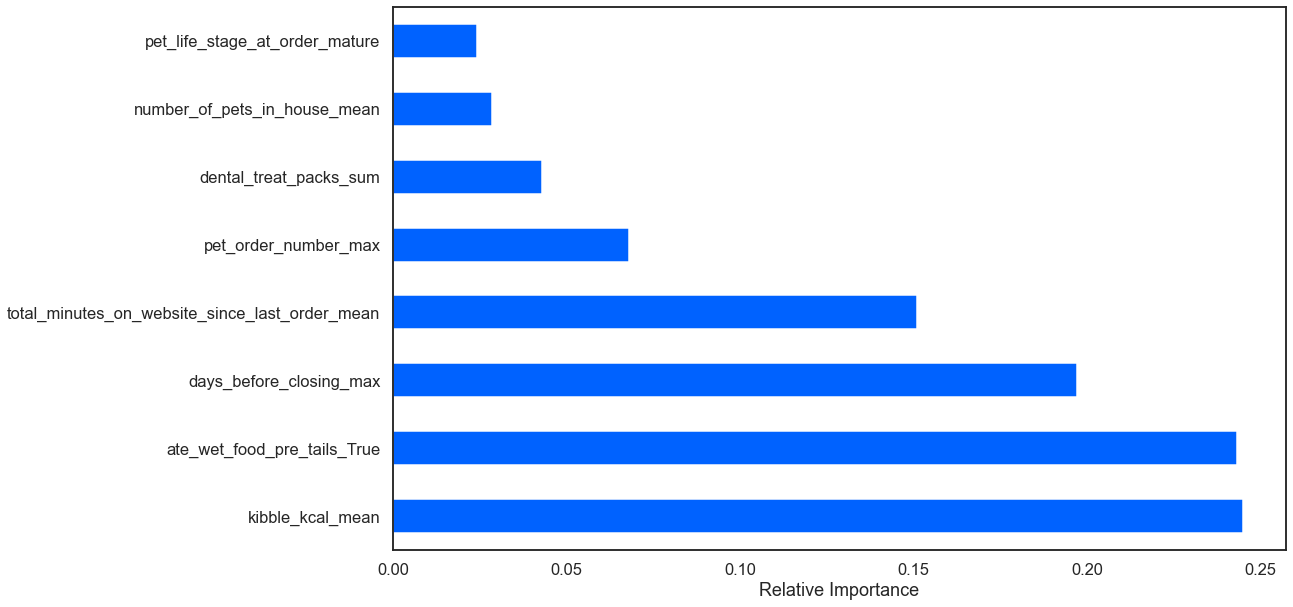

In [346]:
# Plot feature importances
feature_imp = pd.Series(model.feature_importances_, index=Selected_Features).sort_values(ascending=False)

ax = feature_imp.plot(kind='barh', figsize=(16, 10))
ax.set(xlabel='Relative Importance');
ax.set(ylabel='');

### Gradient Boosting

In [347]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

error_list = list()

tree_list = [15, 25, 50, 100, 200, 400]
for n_trees in tree_list:
    
    GBC = GradientBoostingClassifier(max_features=5, n_estimators=n_trees, random_state=42) #5 to reduce processing time

    print(f'Fitting model with {n_trees} trees')
    GBC.fit(X_train.values, y_train.values)
    y_pred = GBC.predict(X_test)

    error = 1.0 - accuracy_score(y_test, y_pred)
    error_list.append(pd.Series({'n_trees': n_trees, 'error': error}))

error_df = pd.concat(error_list, axis=1).T.set_index('n_trees')

error_df

Fitting model with 15 trees
Fitting model with 25 trees
Fitting model with 50 trees
Fitting model with 100 trees
Fitting model with 200 trees
Fitting model with 400 trees


,error
n_trees,
15.0,0.220779
25.0,0.218742
50.0,0.215432
100.0,0.215177
200.0,0.214158
400.0,0.216450


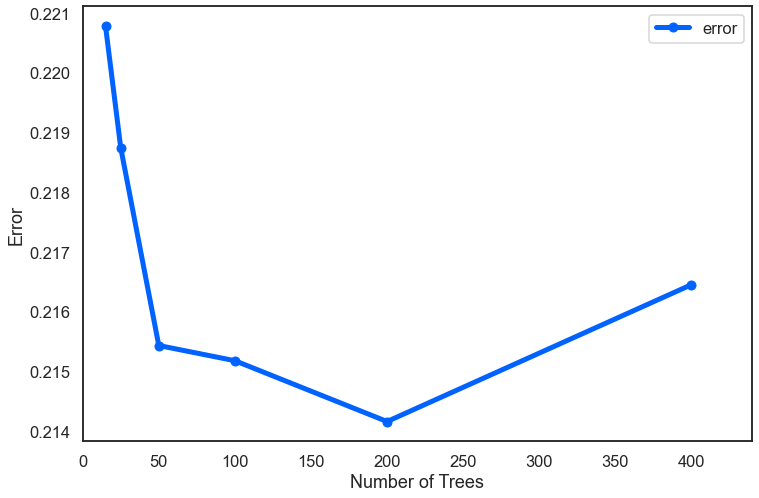

In [348]:
# Plot results
sns.set_context('talk')
sns.set_style('white')
sns.set_palette(palette)

# Create the plot
ax = error_df.plot(marker='o', figsize=(12, 8), linewidth=5)

# Set parameters
ax.set(xlabel='Number of Trees', ylabel='Error')
ax.set_xlim(0, max(error_df.index)*1.1);

In [349]:
# Using grid search with cross validation 
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': tree_list,
              'learning_rate': [0.1, 0.01, 0.001, 0.0001],
              'subsample': [1.0, 0.5], #regulu
              'max_features': [1, 2, 3, 4]}

GV_GBC = GridSearchCV(GradientBoostingClassifier(random_state=42), 
                      param_grid=param_grid, 
                      scoring='accuracy',
                      n_jobs=-1)

GV_GBC = GV_GBC.fit(X_train, y_train)

In [350]:
# Get the best model
GV_GBC.best_estimator_

GradientBoostingClassifier(max_features=3, random_state=42, subsample=0.5)

In [351]:
y_pred = GV_GBC.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.85      0.84      0.84      2666
         1.0       0.67      0.68      0.67      1261

    accuracy                           0.79      3927
   macro avg       0.76      0.76      0.76      3927
weighted avg       0.79      0.79      0.79      3927



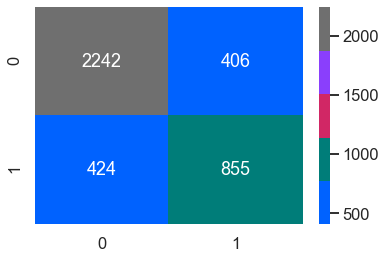

In [353]:
sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='d', cmap=colors)

### AdaBoost

In [354]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ABC = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1))

param_grid = {'n_estimators': [100, 150, 200],
              'learning_rate': [0.01, 0.001]}

GV_ABC = GridSearchCV(ABC,
                      param_grid=param_grid, 
                      scoring='accuracy',
                      n_jobs=-1)

GV_ABC = GV_ABC.fit(X_train, y_train)

In [355]:
GV_ABC.best_estimator_

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.01, n_estimators=100)

In [356]:
y_pred = GV_ABC.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.78      0.87      0.82      2369
         1.0       0.75      0.62      0.68      1558

    accuracy                           0.77      3927
   macro avg       0.76      0.74      0.75      3927
weighted avg       0.77      0.77      0.76      3927



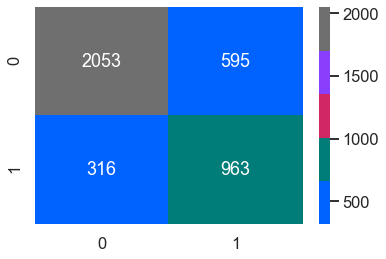

In [357]:
sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='d', cmap=colors)


### Logistic regression (voting classifer)

In [358]:
# L2 regularized logistic regression
LR_L2 = LogisticRegression(penalty='l2', max_iter=500, solver='saga').fit(X_train, y_train)

y_pred = LR_L2.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.82      0.83      0.83      2599
         1.0       0.66      0.64      0.65      1328

    accuracy                           0.77      3927
   macro avg       0.74      0.74      0.74      3927
weighted avg       0.77      0.77      0.77      3927



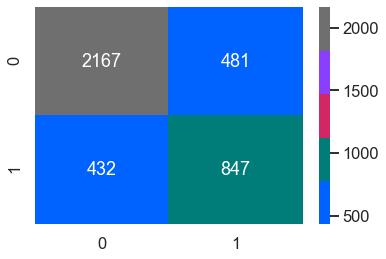

In [359]:
sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='d', cmap=colors)

In [361]:
from sklearn.ensemble import VotingClassifier

# The combined model--logistic regression and gradient boosted trees
estimators = [('LR_L2', LR_L2), ('GBC', GV_GBC)]

VC = VotingClassifier(estimators, voting='soft')
VC = VC.fit(X_train, y_train)

y_pred = VC.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84      2648
         1.0       0.67      0.66      0.66      1279

    accuracy                           0.78      3927
   macro avg       0.75      0.75      0.75      3927
weighted avg       0.78      0.78      0.78      3927



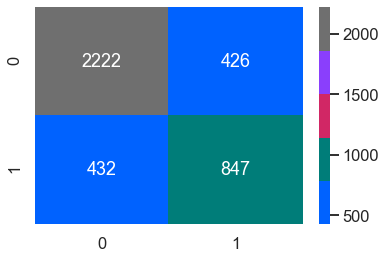

In [364]:
sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='d', cmap=colors)


The combined model has a better performance than the L2 regularized LR model in terms of recall, f1-score and precision for both classes. 

### XGBoost

In [413]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train,label=y_train)
dtest = xgb.DMatrix(X_test,label=y_test)

In [451]:
param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3} 

steps = 20

In [452]:
model = xgb.train(param, dtrain, steps)

In [453]:
preds = model.predict(dtest)
best_preds = np.asarray([np.argmax(line) for line in preds])
print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))
print("F1-score = {}".format(f1_score(y_test, best_preds,average='macro')))

Precision = 0.7536167968312959
Recall = 0.7529990031864963
Accuracy = 0.7835497835497836
F1-score = 0.7533055190624227


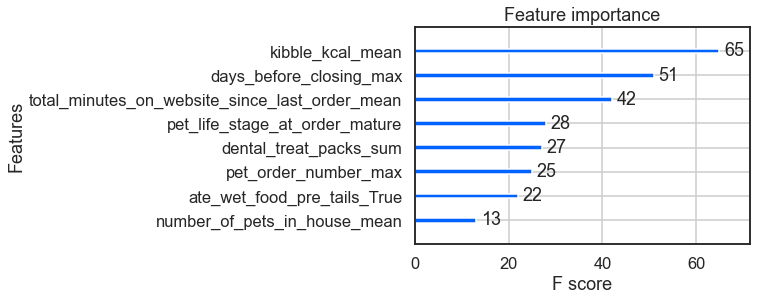

In [458]:
xgb.plot_importance(model)

In [372]:
clf = xgb.XGBClassifier()
parameters = {
     "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
     }

grid = GridSearchCV(clf,
                    parameters, n_jobs=4,
                    scoring="neg_log_loss",
                    cv=3)

grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [373]:
model.dump_model('dump.raw.txt')

In [389]:
print('\n Best estimator:')
print(grid.best_estimator_)
print('\n Best hyperparameters:')
print(grid.best_params_)


 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eta=0.1, gamma=0.0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.100000001, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

 Best hyperparameters:
{'colsample_bytree': 0.5, 'eta': 0.1, 'gamma': 0.0, 'max_depth': 3, 'min_child_weight': 3}


In [454]:
param = {
    'eta': 0.1, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3,
    'min_child_weight': 3,
    'gamma':0.0,
    'colsample_bytree':0.5} 

steps = 20

In [455]:
model2 = xgb.train(param, dtrain, steps)

In [456]:
preds = model2.predict(dtest)
best_preds = np.asarray([np.argmax(line) for line in preds])
print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))
print("F1-score = {}".format(f1_score(y_test, best_preds,average='macro')))

Precision = 0.7526248401347625
Recall = 0.7054153310861724
Accuracy = 0.7736185383244206
F1-score = 0.7187899253562728


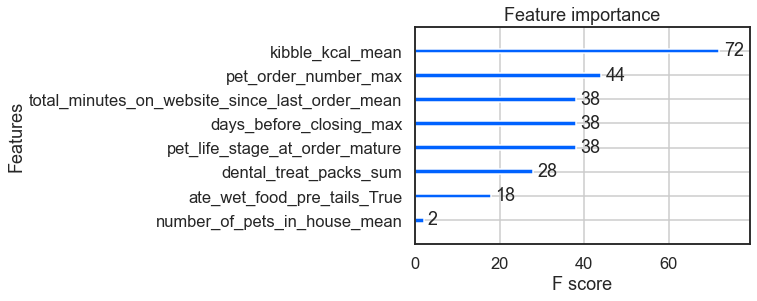

In [457]:
xgb.plot_importance(model2)

Comparing XGB models: 
The first XGB model has a better performance in terms of precision, recall, accuracy and f1-score than the second model. 